# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this a more free form project you'll get a chance to practice all of these skills with the Boston Housing data set, which contains housing values in suburbs of Boston. The Boston Housing Data is commonly used by aspiring data scientists.

## Objectives

You will be able to:

* Load csv files using Pandas
* Find variables with high correlation
* Create box plots

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file `train.csv`)
* Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations using `.loc`, `.iloc` or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
    - Create 2 new dataframes based on a certain split for crime rate.
* Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxides concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centers.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

## Summary

Congratulations, you've completed your first "freeform" exploratory data analysis of a popular data set!

__Goal:__
- Loading the data (which is stored in the file train.csv)
- Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
- Create meaningful subsets of the data using selection operations using .loc, .iloc or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
- Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
- Create 2 new dataframes based on a certain split for crime rate.
- Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

In [35]:
# Import Libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Loading the data (which is stored in the file train.csv)

In [4]:
ls -lt *.csv

 Volume in drive C has no label.
 Volume Serial Number is 26FC-B320

 Directory of C:\Data_Science\FlatIron_DS_Bootcamp\Course_Material\mod1section04\Labs\dsc-project-eda-with-pandas-online-ds-pt-061019


 Directory of C:\Data_Science\FlatIron_DS_Bootcamp\Course_Material\mod1section04\Labs\dsc-project-eda-with-pandas-online-ds-pt-061019

06/24/2019  12:04 PM             3,779 submission_example.csv
06/24/2019  12:04 PM            11,929 test.csv
06/24/2019  12:04 PM            24,462 train.csv
               3 File(s)         40,170 bytes
               0 Dir(s)  157,537,185,792 bytes free


In [5]:
df = pd.read_csv("./train.csv")
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


#### Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [7]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


#### Create meaningful subsets of the data using selection operations using .loc, .iloc or related operations. 


In [14]:
df_blk_less_376 = df[df["black"] <= 376.730000]
df_blk_less_376

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
12,19,0.80271,0.0,8.14,0,0.538,5.456,36.6,3.7965,4,307,21.0,288.99,11.69,20.2
13,21,1.25179,0.0,8.14,0,0.538,5.570,98.1,3.7979,4,307,21.0,376.57,21.02,13.6
17,28,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307,21.0,306.38,17.28,14.8
18,31,1.13081,0.0,8.14,0,0.538,5.713,94.1,4.2330,4,307,21.0,360.17,22.60,12.7
19,32,1.35472,0.0,8.14,0,0.538,6.072,100.0,4.1750,4,307,21.0,376.73,13.04,14.5
20,35,1.61282,0.0,8.14,0,0.538,6.096,96.9,3.7598,4,307,21.0,248.31,20.34,13.5
52,77,0.10153,0.0,12.83,0,0.437,6.279,74.5,4.0522,5,398,18.7,373.66,11.97,20.0
69,103,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
79,119,0.13058,0.0,10.01,0,0.547,5.872,73.1,2.4775,6,432,17.8,338.63,15.37,20.4
84,124,0.15038,0.0,25.65,0,0.581,5.856,97.0,1.9444,2,188,19.1,370.31,25.41,17.3


In [10]:
df_blk_less_376.max()

ID         491.0000
crim        73.5341
zn          80.0000
indus       27.7400
chas         1.0000
nox          0.8710
rm           7.9290
age        100.0000
dis          9.0892
rad         24.0000
tax        711.0000
ptratio     21.2000
black      376.7300
lstat       36.9800
medv        50.0000
dtype: float64

In [13]:
df_blk_less_376.mean()

ID         296.988095
crim         7.138253
zn           3.857143
indus       15.930357
chas         0.047619
nox          0.631405
rm           5.977690
age         83.178571
dis          2.753092
rad         14.321429
tax        513.369048
ptratio     18.663095
black      261.514286
lstat       16.399643
medv        19.292857
dtype: float64

In [16]:
df_crim_max = df[df["crim"] == 73.534100 ]
df_crim_max

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
271,419,73.5341,0.0,18.1,0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,8.8


In [27]:
df_blk_more_392 = df[df["black"] >= 392.050000]
df_blk_more_392.mean()

ID         234.682635
crim         2.302291
zn          14.167665
indus        9.423353
chas         0.047904
nox          0.525934
rm           6.275749
age         63.557485
dis          4.068930
rad          7.982036
tax        372.029940
ptratio     18.486826
black      395.587186
lstat       11.585090
medv        23.042515
dtype: float64

#### Investigating distributions

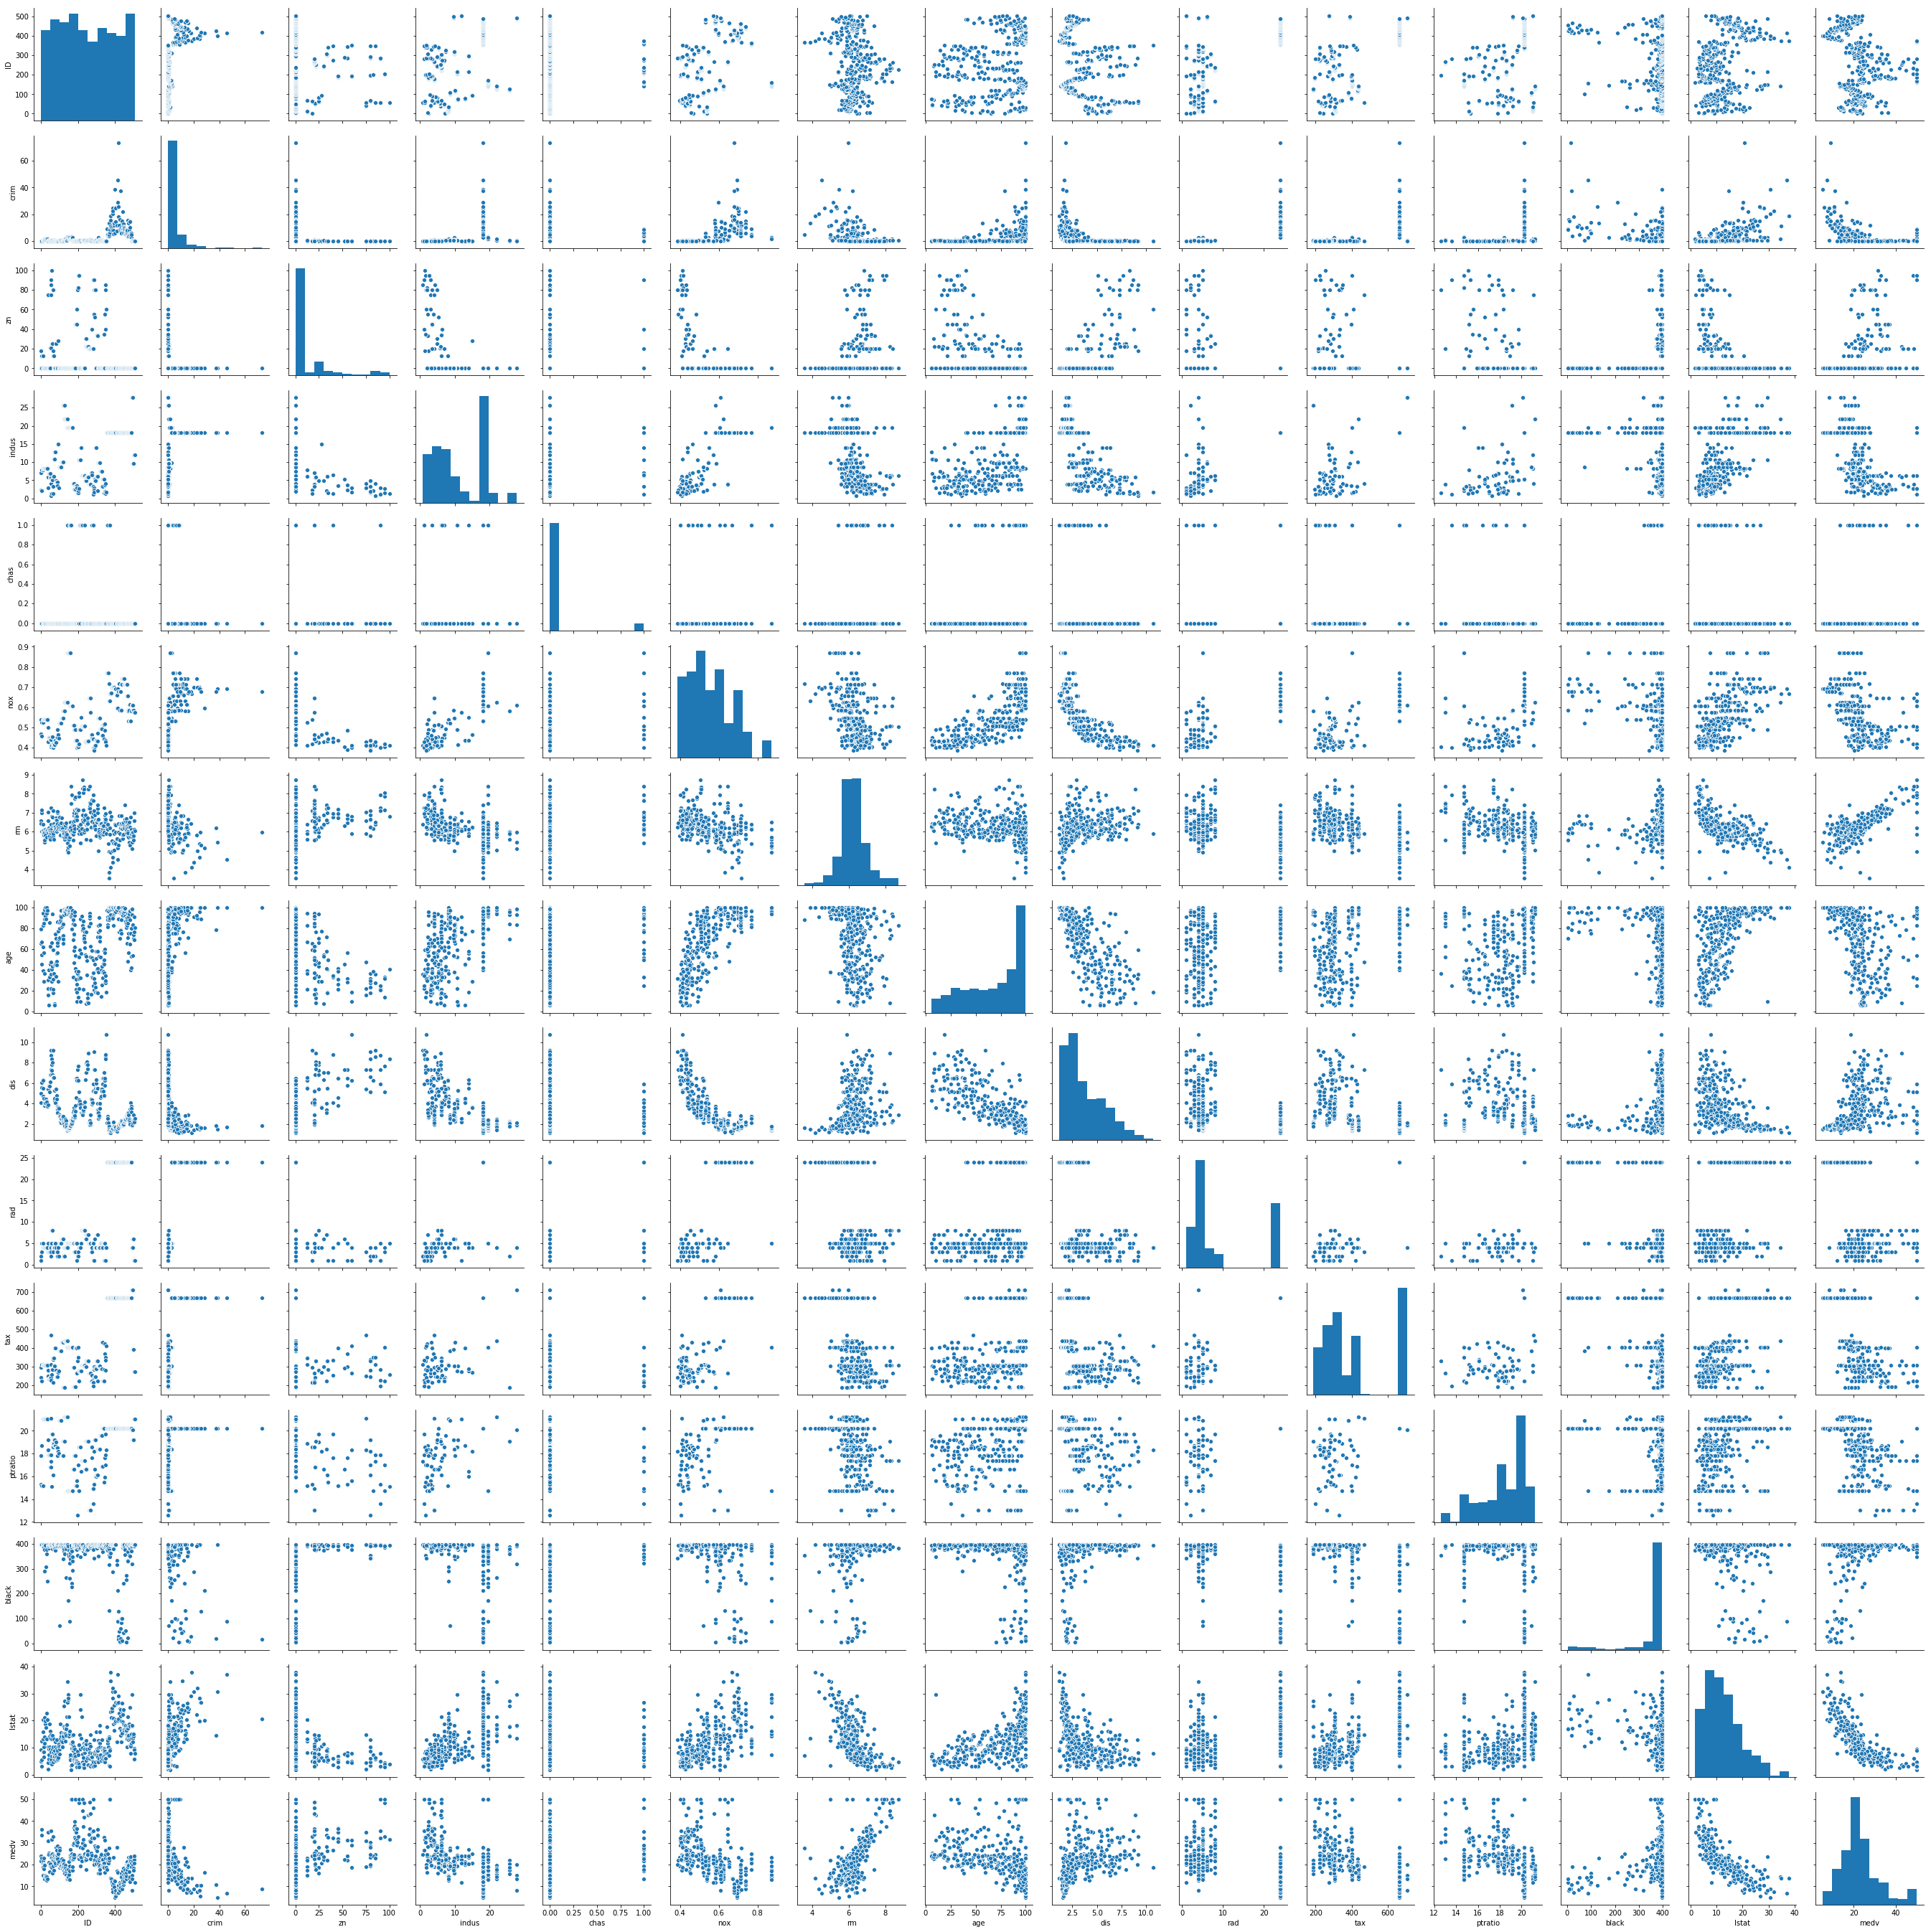

In [21]:
sns.pairplot(df)

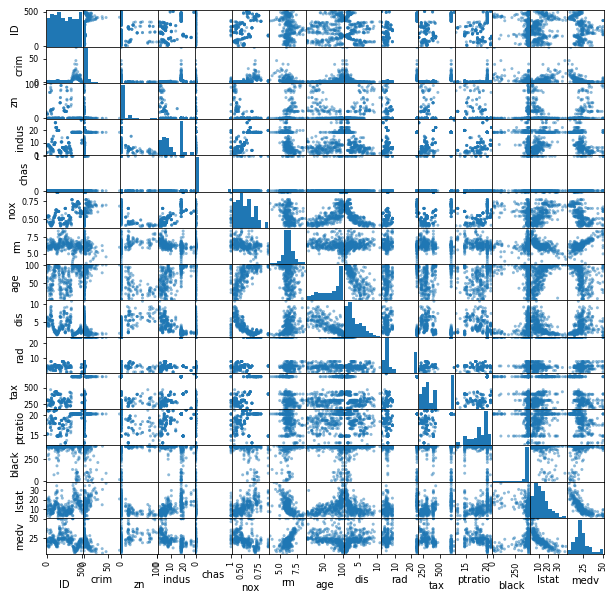

In [18]:
pd.plotting.scatter_matrix(df, figsize=(10,10));

#### Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't

In [67]:
df_next_charles_river = df[df["chas"] == 1]
df_next_charles_river.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,decades
97,143,3.32105,0.0,19.58,1,0.871,5.403,100.0,1.3216,5,403,14.7,396.90,26.82,13.4,10.0
104,155,1.41385,0.0,19.58,1,0.871,6.129,96.0,1.7494,5,403,14.7,321.02,15.12,17.0,9.0
108,161,1.27346,0.0,19.58,1,0.605,6.250,92.6,1.7984,5,403,14.7,338.92,5.50,27.0,9.0
110,164,1.51902,0.0,19.58,1,0.605,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0,9.0
145,209,0.13587,0.0,10.59,1,0.489,6.064,59.1,4.2392,4,277,18.6,381.32,14.66,24.4,5.0


In [69]:
df_NOT_next_charles_river = df[df["chas"] == 0 ]
df_NOT_next_charles_river.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,decades
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,6.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,7.0
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,4.0
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,5.0
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,6.0


#### Create 2 new dataframes based on a certain split for crime rate.


In [71]:
df_crim_below_mean = df[df["crim"] <= 3.36 ]
df_crim_below_mean.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,decades
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,6.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,7.0
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,4.0
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,5.0
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,6.0


In [72]:
df_crim_above_mean = df[df["crim"] > 3.36 ]
df_crim_above_mean.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,decades
234,357,8.98296,0.0,18.1,1,0.77,6.212,97.4,2.1222,24,666,20.2,377.73,17.60,17.8,9.0
235,358,3.84970,0.0,18.1,1,0.77,6.395,91.0,2.5052,24,666,20.2,391.34,13.27,21.7,9.0
236,359,5.20177,0.0,18.1,1,0.77,6.127,83.4,2.7227,24,666,20.2,395.43,11.48,22.7,8.0
237,360,4.26131,0.0,18.1,0,0.77,6.112,81.3,2.5091,24,666,20.2,390.74,12.67,22.6,8.0
238,361,4.54192,0.0,18.1,0,0.77,6.398,88.0,2.5182,24,666,20.2,374.56,7.79,25.0,8.0


#### Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data.


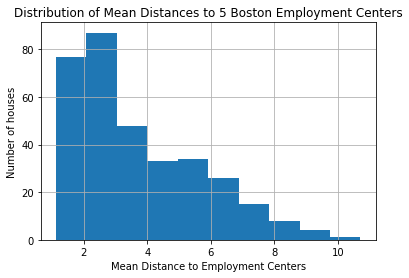

In [39]:
# Histogram of Distribution of Mean Distances to 5 Boston Employment Centers

df["dis"].hist()
plt.title("Distribution of Mean Distances to 5 Boston Employment Centers")
plt.xlabel('Mean Distance to Employment Centers')
plt.ylabel('Number of houses')
plt.show()

In [ ]:
# Comment:
# Skewed distribution; most houses in this sample are quite close 
# to the employment centers, few are far

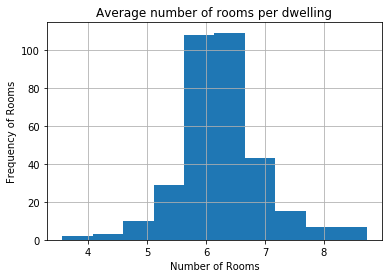

In [42]:
# Histogram of number of rooms
# rm - average number of rooms per dwelling.
df["rm"].hist()
plt.title("Average number of rooms per dwelling")
plt.xlabel("Number of Rooms")
plt.ylabel("Frequency of Rooms")
plt.show()

In [ ]:
# Comment:
# The number of rooms in houses is approximately normally distributed, 
# with a mean around 6 rooms.

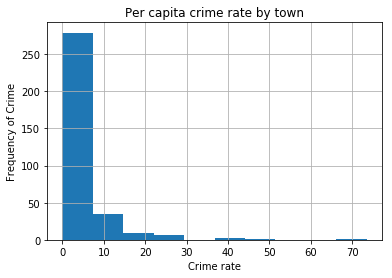

In [43]:
# Histogram for crime in Boston Area
# crim - per capita crime rate by town.

df["crim"].hist()
plt.title("Per capita crime rate by town")
plt.xlabel("Crime rate")
plt.ylabel("Frequency of Crime")
plt.show()

In [ ]:
# Comment:
# Most crime rates are well below 10.

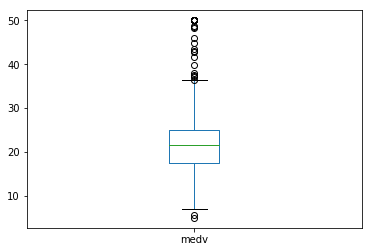

In [44]:
# Boxplot MEDV

df["medv"].plot(kind="box");

In [45]:
df["medv"].describe()

count    333.000000
mean      22.768769
std        9.173468
min        5.000000
25%       17.400000
50%       21.600000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

In [ ]:
# Comment:
# Outliers 38-50 and below 7

####  Investigation Correlations

In [46]:
abs(df.corr()) > 0.75

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
crim,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
zn,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
indus,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
chas,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
nox,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False
rm,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
age,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
dis,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False
rad,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False


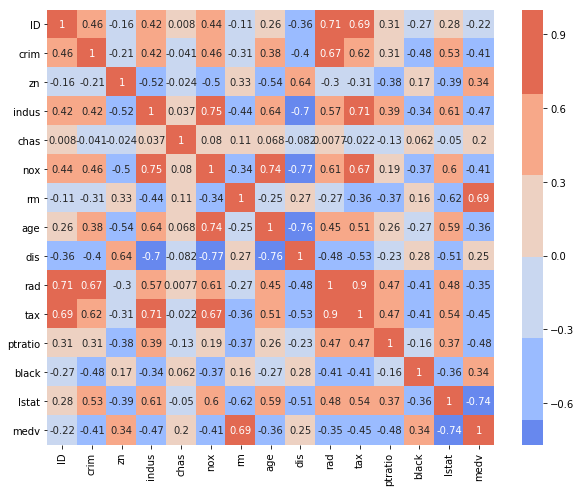

In [48]:
# Plotting the correlation
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), center=0, annot = True, cmap = sns.color_palette("coolwarm"));

In [ ]:
# Comments:
# ID and rad have a correlation coefficient of 0.7075262711727565!
# indus and nox have a correlation coefficient of 0.7500874390908759!
# indus and tax have a correlation coefficient of 0.7083132697607584!
# nox and age have a correlation coefficient of 0.7359995828422857!
# rad and tax have a correlation coefficient of 0.9035618963206118!

#### Investigation Linearity

In [60]:
# Creates a list object of X_cols for column names
X_cols = [col for col in df.columns]  
X_cols.remove("ID")
X_cols.remove("crim")
X_cols

['zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat',
 'medv']

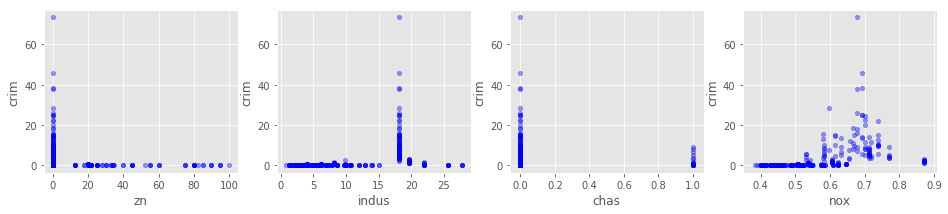

In [61]:
# Review linearity and categorical data - using scatterplot
plt.style.use("ggplot")
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))
for xcol, ax1 in zip(list(X_cols)[0:4], axes):
    df.plot(kind='scatter', x= xcol, y="crim", ax=ax1, alpha=0.4, color='b')

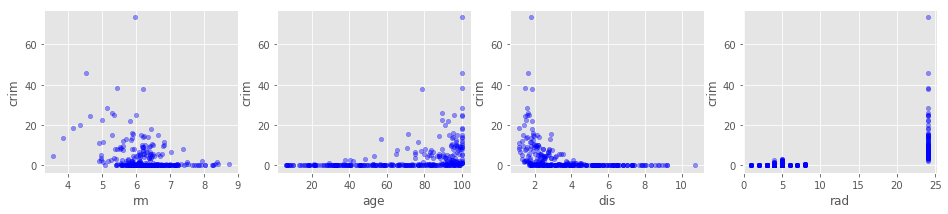

In [62]:
# Review linearity and categorical data - using scatterplot
plt.style.use("ggplot")
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))
for xcol, ax1 in zip(list(X_cols)[4:8], axes):
    df.plot(kind='scatter', x= xcol, y="crim", ax=ax1, alpha=0.4, color='b')

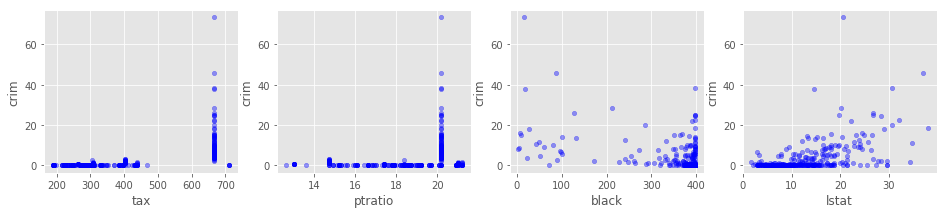

In [63]:
# Review linearity and categorical data - using scatterplot
plt.style.use("ggplot")
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))
for xcol, ax1 in zip(list(X_cols)[8:12], axes):
    df.plot(kind='scatter', x= xcol, y="crim", ax=ax1, alpha=0.4, color='b')

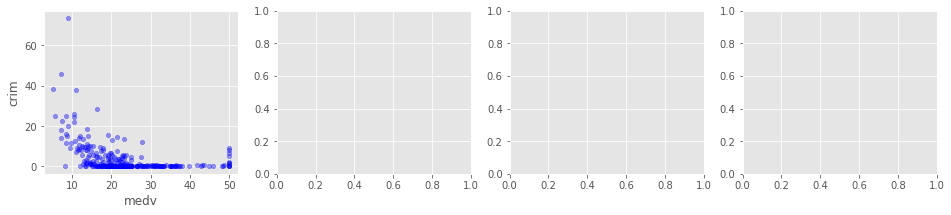

In [64]:
# Review linearity and categorical data - using scatterplot
plt.style.use("ggplot")
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))
for xcol, ax1 in zip(list(X_cols)[12:16], axes):
    df.plot(kind='scatter', x= xcol, y="crim", ax=ax1, alpha=0.4, color='b')

In [ ]:
# Comments:


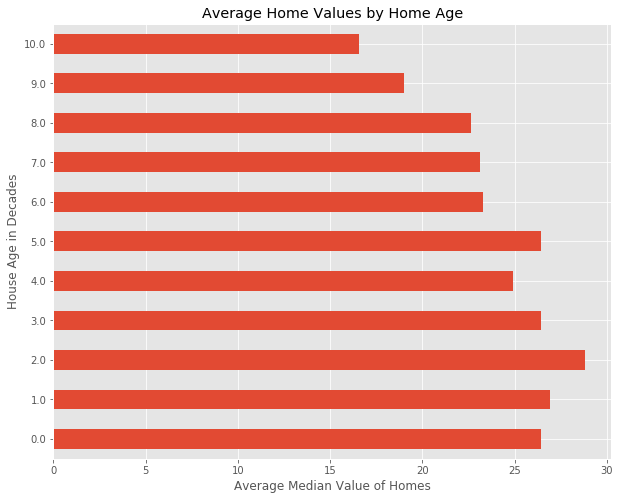

In [65]:
# Other investigations will vary
# One exploration of home values by age:
df['decades'] = df.age // 10
to_plot = df.groupby('decades').medv.mean()
to_plot.plot(kind='barh', figsize=(10,8))
plt.ylabel('House Age in Decades')
plt.xlabel('Average Median Value of Homes')
plt.title('Average Home Values by Home Age');

In [ ]:
# Comment:
# The approximate age of the house appears most significant for homes over 50 years of age. 
# Before this, there appears to be little impact.